# Tutorial_1 Das BWKI Hundetutorial 🐶🩺

## Musterlösung für Kapitel 5 📚

Dies ist die Musterlösung zu den Programmieraufgaben des fünften & letzten Kapitels. 

Schaut sie euch erst an wenn ihr versucht habt, die Übung selbstständig zu lösen und nicht weiter kommt. Bei Fragen könnt ihr euch jederzeit auf unserem Discord Server mit anderen Teilnehmer:innen austauschen!

Viel Erfolg bei diesem Tutorial!

Als erstes müssen wir unsere **Daten einlesen** und für die Datenverarbeitung benötigte Packages (Module) einlesen.

### Vorbereitung 

In [1]:
#Importiere numpy, ein Paket zur Datenverarbeitung
import torch
import numpy as np
import torch.nn as nn

ModuleNotFoundError: No module named 'torch'

In [2]:
#Prüfe in welchem Arbeitsverzeichnis (working directory) du gerade arbeitest 
#Im selben Ordner müssen auch die Daten gespeicherts sein
%pwd

'/home/jovyan/ML/Erkranktet Hunde'

In [3]:
#Du bist noch nicht im richtigen Ordner? Ändere mit cd /Pfad deine working directory
cd /Users/ ...

NameError: name 'cd' is not defined

In [5]:
#Einlesen der Daten
# auf Windows: /
# auf Mac & Linux: \
D = np.load('train_data.npy')

In [6]:
# Eigenschaften des Datensatzes einsehen (Zeilen, Spalten)
D.shape

(426, 14)

### Was bisher geschah ....

... eine ganze Menge !! In den vorangegangenen Kapiteln hast du gelernt, einzelne Datenpunkte aus einem Datensatz zu extrahieren for- und while-Schleifen, if-Abfragen sowie Funktionen der numpy-Bibliothek anzuwenden. Du hast gelernt, wie du einen Klassifikator mit ein oder mehreren Merkmalen implementierst und wie man einen solchen Klassifikator bewertet, indem man die Genauigkeit des Klassifikators auf einem Testdatensatz berechnet. Ebenso hast du gelernt, wie du die Gewichte und das Bias mittels des Gradientenabstiegverfahrens bestimmst. Ein Modell mit wenigen Merkmalen ist einem Modell mit multiplen Merkmalen in der Geauigkeit seiner Vorhersagen i.d.R. unterlegen, weshalb du multivariate Modelle kennengelernt hast.

Im letzten Kapitel lernst du nun wie man neuronale Netze (abgekürzt NN) implementieren, trainieren, und anschließend evaluieren kann.

In der ersten Übung des 5. Kapitels musst du deinen Datensatz in einen Trainings- und einen Testdatensatz aufteilen. Dadurch kannst du anschließend die Genauigkeit deines neuronalen Netzes evaluieren indem du dein Netz auf neuen Daten testest (Abschnitt 6/11). Nimm 80% aller Daten für das Training und die restlichen 20% als Testdatensatz. Dies ist die MUSTERLÖSUNG! Die Coding-Konsole im KI-Kurs enthält weitere Informationen zu Funktionen, Argumenten oder Erklärungen zum Ergebnis.

In [7]:
def train_test_split(D):
    
    train_ix = np.random.random(size=D.shape[0]) < 0.8
    test_ix = np.logical_not(train_ix)
    
    train_data = D[train_ix]
    test_data = D[test_ix]
    
    return train_data, test_data

In [8]:
# nicht für die Lösung im KI-Kurs notwendig
# Eigenschaften der 2 verschiedenen Datensätze einsehen (Zeilen, Spalten)
train_data, test_data = train_test_split(D)
print(f"Dimension der Trainingsdaten: {train_data.shape}, Dimension der Testdaten: {test_data.shape}")

Dimension der Trainingsdaten: (343, 14), Dimension der Testdaten: (83, 14)


---

Wir können die logistische Regession, die wir in den vorangegangenen Aufgaben implementiert haben, auch mit Pytorch realisieren. Hierfür verwenden wir die `nn.Linear-Klasse`. 
Indem wir ein "neuronales Netz" implementieren, welches nur eine Schicht hat, können wir eine logistische Regression simulieren. Im weiteren Verlauf des Tutorials werden wir natürlich auch noch komplexere Netze bauen! Die Kostenfunktion - hier nennen wir sie loss - ist in `nn.BCEWithLogitsLos` implementiert. 


Unser neuronales Netz besteht in diesem Fall aus einer einzigen Schicht mit 13 Neuronen, welche direkt mit den Inputs verbunden ist. D.h. die Ausgabe unseres Netzes ist eine einfache gewichtete Summe der Inputs. Finde passende Werte für die Hyperparameter `n_step` (Anzahl der Trainingsdurchgänge) und `learning_rate` (auch alpha genannt). Bestimme wie stark sich das Netzwerk während der Backpropagation anpasst (Abschnitt 7/11). Dies ist die MUSTERLÖSUNG! Die Coding-Konsole im KI-Kurs enthält weitere Informationen zu Funktionen, Argumenten oder Erklärungen zum Ergebnis.

In [9]:
import torch
import numpy as np
import torch.nn as nn


def train(D):

    # Hyper-parameter
    n_steps = 8000
    learning_rate = 0.01
    input_size = 13

    # Daten vorbereiten
    X = D[:, :-1].astype(np.float32)
    labels = D[:, -1].astype(np.float32)
    X = torch.from_numpy(X)
    y = torch.from_numpy(labels)

    # Modell definieren
    class LogisticRegression(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            self.linear = nn.Linear(input_size, 1)  # Xw (linear layer)

        def forward(self, x):
            out = self.linear(x)
            return out
    model = LogisticRegression(input_size)

    # loss (Kostenfunktion)
    # Dokumentation: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # Sigmoid und Binary-Cross-Entropy-Loss

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=0.99)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X)[:, 0]
        cost = criterion(outputs, y)

        # backward pass (automatically computes gradients)
        optimizer.zero_grad()  # reset gradients (torch accumulates them)
        cost.backward()  # computes gradients

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # Berechnung der Accuracy
        pred_labels = outputs > 0
        is_correct = torch.eq(pred_labels, y.byte()).float()
        accuracy = torch.mean(is_correct).item()
        
        #Damit wir einen Überblick bekommen, wie unser Modell trainiert wird und wie sich die Genauigkeit ändert
        # lassen wir uns alle 1000 Epochen die Genauigkeit ausgegeben
        if e%1000 == 0:
            print("Epoche: {:<4} | Genauigkeit: {:.3f}".format(e+1, accuracy)) #e+1 weil es bei 0 anfängt zu zählen, wir aber nicht "Epoche 0" ausgeben wollen

    return model

ModuleNotFoundError: No module named 'torch'

In [ ]:
# nicht für die Lösung im KI-Kurs notwendig
#Trainiere das Modell
#Lasse dir die Veränderungen der Genauigkeit während der Backpropagation ausgeben
optimized_model = train(D)

Epoche: 1    | Genauigkeit: 0.596
Epoche: 1001 | Genauigkeit: 0.880
Epoche: 2001 | Genauigkeit: 0.883
Epoche: 3001 | Genauigkeit: 0.880
Epoche: 4001 | Genauigkeit: 0.878
Epoche: 5001 | Genauigkeit: 0.880
Epoche: 6001 | Genauigkeit: 0.866
Epoche: 7001 | Genauigkeit: 0.880


Super gemacht!
Dein Modell sollte nun eine Genauigkeit von ca. 88% erzielen.

---

Modelle mit vielen Layern sind flexibler und können sich besser an die Daten anpassen. Daher ist es nun deine Aufgabe den unten folgenden Code für ein Multi-Layer-Perceptron (MLP) um die passenden Werte der Hyperparameter `n_steps` und `learning_rate` zu erweitern (Abschnitt 8/11).Dies ist die MUSTERLÖSUNG! Die Coding-Konsole im KI-Kurs enthält weitere Informationen zu Funktionen, Argumenten oder Erklärungen zum Ergebnis.

In [ ]:
import torch
import numpy as np
import torch.nn as nn


def train_MLP(D):

    # Hyper-parameter
    n_steps = 4000
    learning_rate = 0.01
    input_size = 13
    output_size = 1

    # Daten vorbereiten
    X = D[:, :-1].astype(np.float32)
    y = D[:, -1].astype(np.float32)
    X = torch.from_numpy(X)
    y = torch.from_numpy(y)
    feature_means = torch.mean(X, dim=0)

    # Modell definieren
    class MLP(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            n_neurons = 4
            self.layers = nn.Sequential(
                nn.Linear(input_size, n_neurons),
                nn.ReLU(),
                nn.Linear(n_neurons, n_neurons),
                nn.ReLU(),
                nn.Linear(n_neurons, output_size)
            )

        def forward(self, x):
            x = x - feature_means
            out = self.layers(x)
            return out

    model = MLP(input_size)

    # loss
    # Dokumentation: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # Sigmoid und Binary-Cross-Entropy-Loss

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # momentum = 0.9  # Wert zwischen 0. und 1.
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X)[:, 0]
        cost = criterion(outputs, y)

        # backward pass (berechnet die Gradienten automatisch)
        optimizer.zero_grad()  # reset gradients (torch akkumuliert Gradienten)
        cost.backward()  # berechnen der Gradienten

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # Berechnung der Accuracy
        pred_labels = outputs > 0
        is_correct = torch.eq(pred_labels, y.byte()).float()
        accuracy = torch.mean(is_correct).item()

        if e%1000 == 0:
            print("Epoche: {:<4} | Genauigkeit: {:.3f}".format(e+1, accuracy)) #e+1 weil es bei 0 anfängt zu zählen, wir aber nicht "Epoche 0" ausgeben wollen


    return model

In [ ]:
# nicht für die Lösung im KI-Kurs notwendig
#Trainiere das Modell
#Lasse dir die Veränderungen der Genauigkeit während der Backpropagation ausgeben
optimized_model_MLP = train_MLP(D)

Epoche: 1    | Genauigkeit: 0.362
Epoche: 1001 | Genauigkeit: 0.915
Epoche: 2001 | Genauigkeit: 0.920
Epoche: 3001 | Genauigkeit: 0.923


Super - wir sehen, dass du den Einsatz eines komplexeren MLPs, die Genauigkeit steigt.

---


Um zu verstehen, was Overfitting ist und wie du es erkennst, ist jetzt deine Aufgabe ein eigenes neuronales Netz zu erstellen, welches den Trainingsdatensatz perfekt (auswendig)lernt. Das heißt: Dein Netz sollte eine Genauigkeit von 1 auf dem Trainingsdatensatz aufweisen. Evaluiere dein Modell anschließend auf den Testdaten. Dabei solltest du merken, dass dieses Modell auf den Trainingsdaten überangepasst ist und die Erkenntnisse des Modells damit schlecht auf unbekannte Daten wie z.B. den Testdatensatz übertragen werden können. In anderen Worten generalisiert das Modell schlecht (Abschnitt 9/10). Dies ist die MUSTERLÖSUNG! Die Coding-Konsole im KI-Kurs enthält weitere Informationen zu Funktionen, Argumenten oder Erklärungen zum Ergebnis.

In [ ]:
import torch
import numpy as np
import torch.nn as nn


def train(D):

    train, test = D[:200], D[200:]  # Die Auswertung der Aufgabe basiert auf diesem Split

    # Hyper-parameter
    n_steps = 2000
    input_size = 13
    output_size = 1
    learning_rate = 0.01

    # Trainings-Daten vorbereiten
    X = train[:, :-1].astype(np.float32)
    y = train[:, -1].astype(np.float32)
    X_train = torch.from_numpy(X)
    y_train = torch.from_numpy(y)
    feature_means = torch.mean(X_train, dim=0)

    # Test-Daten vorbereiten
    X = test[:, :-1].astype(np.float32)
    y = test[:, -1].astype(np.float32)
    X_test = torch.from_numpy(X)
    y_test = torch.from_numpy(y)

    # Modell definieren
    class MLP(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            n_neurons = 20
            self.layers = nn.Sequential(
                nn.Linear(input_size, n_neurons),
                nn.ReLU(),
                nn.Linear(n_neurons, n_neurons),
                nn.ReLU(),
                nn.Linear(n_neurons, n_neurons),
                nn.ReLU(),
                nn.Linear(n_neurons, output_size)
            )

        def forward(self, x):
            x = x - feature_means
            out = self.layers(x)
            return out

    model = MLP(input_size)

    # loss and optimizer
    # checkout: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # sigmoid + binary cross entropy

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # momentum = 0.9  # Wert zwischen 0. und 1.
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X_train)[:, 0]  # Xw (linear layer)
        loss = criterion(outputs, y_train)  # sigmoid and cross-entropy loss

        # backward pass (automatically computes gradients)
        optimizer.zero_grad()  # reset gradients (torch accumulates them)
        loss.backward()  # computes gradients

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # berechne Trainings-Accuracy
        outputs = model.forward(X_train)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_train.byte()).float()
        accuracy_train = torch.mean(is_correct).item()

        # berechne Test-Accuracy
        outputs = model.forward(X_test)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_test.byte()).float()
        accuracy_test = torch.mean(is_correct).item()

    print(f'Epoch {e}, Loss: {loss:.4f}, Acc train: {accuracy_train:.2f},' \
          f'Acc test: {accuracy_test:.2f}')
    return model

In [ ]:
# nicht für die Lösung im KI-Kurs notwendig

#Führe die Funktion train_overfitting aus und schau dir die Werte deines NNs an.
#Evaluation: Wie gut performt das NN auf den Testdaten?
#Spricht man hier überhaupt schon von Overfitting? Recherchiere!
optimized_model_overfitting = train(D)

Epoch 1999, Loss: 0.0000, Acc train: 1.00,Acc test: 0.41


---

## Teste Dein Wissen! 

Nun hast du einiges über die Methoden des maschinellen Lernens erfahren. In der letzten Aufgabe sollst du ein neuronales Netz entwickeln, welches die Hunde als krank oder gesund klassifiziert. **Achtung**: Behalte dabei immer auch Over- und Underfitting im Auge! Es gibt bei dieser Aufgabe **nicht nur eine Lösung**, sondern viele verschiedene Lösungen, die zum Ziel führen. Wir stellen dir eine dieser Lösungen vor (Abschnitt 10/11). Dies ist die MUSTERLÖSUNG! Die Coding-Konsole im KI-Kurs enthält weitere Informationen zu Funktionen, Argumenten oder Erklärungen zum Ergebnis.

In [ ]:
import torch
import numpy as np
import torch.nn as nn


def train(D):

    train, test = D[:200], D[200:]  # Die Auswertung der Aufgabe basiert auf diesem Split

    # Hyper-parameter
    n_steps = 2000
    input_size = 13
    output_size = 1
    learning_rate = 0.01

    # Trainings-Daten vorbereiten
    X = train[:, :-1].astype(np.float32)
    y = train[:, -1].astype(np.float32)
    X_train = torch.from_numpy(X)
    y_train = torch.from_numpy(y)
    feature_means = torch.mean(X_train, dim=0)

    # Test-Daten vorbereiten
    X = test[:, :-1].astype(np.float32)
    y = test[:, -1].astype(np.float32)
    X_test = torch.from_numpy(X)
    y_test = torch.from_numpy(y)

    # Modell definieren
    class MLP(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            n_neurons = 20
            self.layers = nn.Sequential(
                nn.Linear(input_size, output_size)
            )

        def forward(self, x):
            x = x - feature_means
            out = self.layers(x)
            return out

    model = MLP(input_size)

    # loss and optimizer
    # checkout: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # sigmoid + binary cross entropy

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # momentum = 0.9  # Wert zwischen 0. und 1.
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X_train)[:, 0]  # Xw (linear layer)
        loss = criterion(outputs, y_train)  # sigmoid and cross-entropy loss

        # backward pass (automatically computes gradients)
        optimizer.zero_grad()  # reset gradients (torch accumulates them)
        loss.backward()  # computes gradients

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # berechne Trainings-Accuracy
        outputs = model.forward(X_train)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_train.byte()).float()
        accuracy_train = torch.mean(is_correct).item()

        # berechne Test-Accuracy
        outputs = model.forward(X_test)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_test.byte()).float()
        accuracy_test = torch.mean(is_correct).item()

    print(f'Epoch {e}, Loss: {loss:.4f}, Acc train: {accuracy_train:.2f},' \
          f'Acc test: {accuracy_test:.2f}')
    return model

In [ ]:
#Führe die Funktion train aus und schau dir die Werte deines NNs an.
#Evaluation: Wie gut performt das NN auf den Testdaten?
optimized_model_best = train(D)

---

Hier können wir sehen,
dass wir für dieses Modell eine Trainingsgenauigkeit von 87% und eine Testgenauigkeit von 73% haben.
Hier könnte man schon leichtes Overfitting vermuten, aber genauso gut kann man noch sagen, dass dies noch im Rahmen ist und das Modell recht gut generalisiert.

Nichtsdestotrotz können wir uns noch ein paar weitere Beispiele von Under- sowie Overfitting ansehen.

Da die Funktion `train` leider nur einen Datensatz übergeben bekommt und das Modell innerhalb der Funktion definiert wird, erstellen wir uns nun zwei weitere Funktionen `train_overfit` sowie `train_underfit`, welche ein entsprechend über- sowie unterangepasstes Modell produzieren.

## EXKURS: Over- & Underfitting 

Die folgenden Beispiele sind nicht mehr für die Lösung der Aufgaben im KI Kurs notwendig. <br> Du kannst diesen Abschnitt auch überspringen und weiter unten bei **"du hast es geschafft"**" fortfahren". <br> Zum besseren Verständnis von Over- und Underfitting wollten wir dir die Infos jedoch nicht vorenthalten! 


### Overfitting

Ok, wir wollen nun also ein überangepasstes Modell erzeugen.
Schauen wir uns doch noch einmal die `train`-Funktion an und überlegen, welche Parameter wir wie abändern können, um Overfitting zu erzeugen. Überlege an dieser Stelle gerne kurz selbst, bevor du weiterliest.

Wir haben ein paar Optionen.
1. Wir können das Modell länger trainieren, also `n_steps` erhöhen.
2. Wir können das Modell komplexer gestalten, beispielsweise statt nur einer `nn.Linear`-Schicht können wir fünf verwenden.

Das probieren wir doch gleich mal aus!
Da unser Modell nun mehr Parameter hat und wir auch mehr Trainingsiterationen durchführen, macht es Sinn, die Lernrate ein wenig herunterzuschrauben. Damit wird das Modell umso überangepasster, weil wir feinere Änderungen durchführen, als wenn wir eine große Lernrate verwenden würden.

Unsere Änderungen (vorher -> nachher) sind also:
- `n_steps`: 2000 -> 20000
- Schichten: 1 -> 5
- `learning_rate`: 0.01 -> 0.003

Probieren wir es doch einmal aus!

In [ ]:
def train_overfit(D):

    train, test = D[:200], D[200:]  # Die Auswertung der Aufgabe basiert auf diesem Split

    # Hyper-parameter
    n_steps = 20000 # <--------------- Anzahl Trainingsiterationen erhöht
    input_size = 13
    output_size = 1
    learning_rate = 0.003 # <--------------- Lernrate verringert

    # Trainings-Daten vorbereiten
    X = train[:, :-1].astype(np.float32)
    y = train[:, -1].astype(np.float32)
    X_train = torch.from_numpy(X)
    y_train = torch.from_numpy(y)
    feature_means = torch.mean(X_train, dim=0)

    # Test-Daten vorbereiten
    X = test[:, :-1].astype(np.float32)
    y = test[:, -1].astype(np.float32)
    X_test = torch.from_numpy(X)
    y_test = torch.from_numpy(y)

    # Modell definieren
    class MLP(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            n_neurons = 20
            self.layers = nn.Sequential( # <--------------- mehr Schichten hinzugefügt
                nn.Linear(input_size, output_size),
                nn.ReLU(),
                nn.Linear(output_size, output_size*2), # hier können wir uns zu Testzwecken
                                                       # beliebige Werte für die neuen Schichten ausdenken
                                                       # beispielsweise also output_size*2 bzw. *3
                nn.ReLU(),
                nn.Linear(output_size*2, output_size*3),
                nn.ReLU(),
                nn.Linear(output_size*3, output_size*3),
                nn.ReLU(),
                nn.Linear(output_size*3, output_size)
            )

        def forward(self, x):
            x = x - feature_means
            out = self.layers(x)
            return out

    model = MLP(input_size)

    # loss and optimizer
    # checkout: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # sigmoid + binary cross entropy

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # momentum = 0.9  # Wert zwischen 0. und 1.
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X_train)[:, 0]  # Xw (linear layer)
        loss = criterion(outputs, y_train)  # sigmoid and cross-entropy loss

        # backward pass (automatically computes gradients)
        optimizer.zero_grad()  # reset gradients (torch accumulates them)
        loss.backward()  # computes gradients

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # berechne Trainings-Accuracy
        outputs = model.forward(X_train)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_train.byte()).float()
        accuracy_train = torch.mean(is_correct).item()

        # berechne Test-Accuracy
        outputs = model.forward(X_test)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_test.byte()).float()
        accuracy_test = torch.mean(is_correct).item()

    print(f'Epoch {e}, Loss: {loss:.4f}, Acc train: {accuracy_train:.2f},' \
          f'Acc test: {accuracy_test:.2f}')
    return model

In [ ]:
overfit_model = train_overfit(D)

Epoch 19999, Loss: 0.2897, Acc train: 0.92,Acc test: 0.69


Hier kann man nun eindeutig das Overfitting sehen, da die Trainingsgenauigkeit deutlich über der Testgenauigkeit liegt.
Die Trainingsgenauigkeit liegt bei 0.92, während hingegen die Testgenauigkeit bei 0.69 liegt.
Das ist ein stolzer Unterschied von 33%!

### Underfitting

Nun wollen wir auch die andere Seite der Medaille betrachten und
ein unterangepasstes Modell erzeugen.
Welche Parameter können wir hierfür abändern?

Wir können genau das Gegenteil der vorherigen Änderungen durchführen!
Wenn die Erhöhung der Anzahl an Iterationen unser Netz stärker anpasst,
so sollte die Verringerung der Anzahl an Iterationen unser Netz weniger stark anpassen.

Bei der Lernrate sieht es ein wenig anders aus.
Wenn wir unsere Lernrate erhöhen, würde dies die Verringerung der Anzahl an Trainingsiterationen ausgleichen.
Hier erhalten wir also einen besseren Effekt, wenn wir sowohl die Lernrate als auch die Anzahl an Trainingsiterationen gering halten.

Mit anderen Worten: Unser Modell trainiert nur für wenige Epochen und in jeder Epoche lernt es nur ein kleines bisschen dazu!

Unser Modell können wir nicht noch simpler gestalten, da eine einzige Schicht bereits das Minimum ist,
was wir für ein funktionierendes Modell benötigen.

Die Änderungen sind nun also (im Vergleich zur originellen `train`-Funktion):
- `n_steps`: 2000 -> 200
- `learning_rate`: 0.01 -> 0.0001

In [ ]:
def train_underfit(D):

    train, test = D[:200], D[200:]  # Die Auswertung der Aufgabe basiert auf diesem Split

    # Hyper-parameter
    n_steps = 200 # <--------------- Anzahl Trainingsiterationen verringert
    input_size = 13
    output_size = 1
    learning_rate = 0.0001 # <--------------- Lernrate verringern

    # Trainings-Daten vorbereiten
    X = train[:, :-1].astype(np.float32)
    y = train[:, -1].astype(np.float32)
    X_train = torch.from_numpy(X)
    y_train = torch.from_numpy(y)
    feature_means = torch.mean(X_train, dim=0)

    # Test-Daten vorbereiten
    X = test[:, :-1].astype(np.float32)
    y = test[:, -1].astype(np.float32)
    X_test = torch.from_numpy(X)
    y_test = torch.from_numpy(y)

    # Modell definieren
    class MLP(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            self.layers = nn.Sequential(
                nn.Linear(input_size, output_size),
            )

        def forward(self, x):
            x = x - feature_means
            out = self.layers(x)
            #out = out*np.nan  ---------------- muss weg
            return out

    model = MLP(input_size)

    # loss and optimizer
    # checkout: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # sigmoid + binary cross entropy

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # momentum = 0.9  # Wert zwischen 0. und 1.
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X_train)[:, 0]  # Xw (linear layer)
        loss = criterion(outputs, y_train)  # sigmoid and cross-entropy loss

        # backward pass (automatically computes gradients)
        optimizer.zero_grad()  # reset gradients (torch accumulates them)
        loss.backward()  # computes gradients

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # berechne Trainings-Accuracy
        outputs = model.forward(X_train)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_train.byte()).float()
        accuracy_train = torch.mean(is_correct).item()

        # berechne Test-Accuracy
        outputs = model.forward(X_test)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_test.byte()).float()
        accuracy_test = torch.mean(is_correct).item()

    print(f'Epoch {e}, Loss: {loss:.4f}, Acc train: {accuracy_train:.2f},' \
          f'Acc test: {accuracy_test:.2f}')
    return model

In [ ]:
underfit_model = train_underfit(D)

Epoch 199, Loss: 1.8547, Acc train: 0.52,Acc test: 0.27


Hier sieht man nun eindeutig, dass sowohl die Trainings- als auch die Testgenauigkeit ziemlich gering sind
Eine Genauigkeit von 50% wäre bei unserem Datensatz mit binären Labeln (entweder 0 oder 1) genauso gut wie raten, also macht unser Modell gerade keine allzu gute Vorhersagen.

Wenn ihr den Code oben einige Male ausführt, werdet ihr merken, dass die Testgenauigkeit ein gutes Stück schwankt.
Dies liegt daran, dass unser Modell nicht wirklich etwas lernt und damit recht "unsinnige" Vorhersagen macht.
Manchmal sind diese sehr gut, manchmal sehr schlecht. Unser Netz ist damit also nicht nur underfit, sondern auch noch overfit!

**Grafische Analyse von Over- & Underfitting**
    
Um Over- und Underfitting noch besser zu visualisieren, könnt ihr euch den grafischen Verlauf der Genauigkeiten / des Losses zurückgeben lassen und diesen plotten. Hierfür legen wir zwei neue Variablen `train_acc_hist` und `test_acc_hist` die jeweils den Verlauf der Trainings- sowie Testgenauigkeit beinhalten werden. Nach jeder Epoche fügen wir die aktuellen Genauigkeiten in diese beiden Listen ein. Am Ende lassen wir uns diese Listen ausgeben.

In [ ]:
def train_overfit_with_hist(D):

    train, test = D[:200], D[200:]  # Die Auswertung der Aufgabe basiert auf diesem Split

    train_acc_hist = [] # --------------------------------------------------------- NEU
    test_acc_hist = [] # --------------------------------------------------------- NEU
    
    # Hyper-parameter
    n_steps = 20000
    input_size = 13
    output_size = 1
    learning_rate = 0.003

    # Trainings-Daten vorbereiten
    X = train[:, :-1].astype(np.float32)
    y = train[:, -1].astype(np.float32)
    X_train = torch.from_numpy(X)
    y_train = torch.from_numpy(y)
    feature_means = torch.mean(X_train, dim=0)

    # Test-Daten vorbereiten
    X = test[:, :-1].astype(np.float32)
    y = test[:, -1].astype(np.float32)
    X_test = torch.from_numpy(X)
    y_test = torch.from_numpy(y)

    # Modell definieren
    class MLP(nn.Module):
        def __init__(self, input_size):
            super().__init__()
            n_neurons = 20
            self.layers = nn.Sequential(
                nn.Linear(input_size, output_size),
                nn.ReLU(),
                nn.Linear(output_size, output_size*2),
                nn.ReLU(),
                nn.Linear(output_size*2, output_size*3),
                nn.ReLU(),
                nn.Linear(output_size*3, output_size*3),
                nn.ReLU(),
                nn.Linear(output_size*3, output_size)
            )

        def forward(self, x):
            x = x - feature_means
            out = self.layers(x)
            return out

    model = MLP(input_size)

    # loss and optimizer
    # checkout: https://pytorch.org/docs/stable/nn.html#torch.nn.BCEWithLogitsLoss
    criterion = nn.BCEWithLogitsLoss()  # sigmoid + binary cross entropy

    # optimizer
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.Adam
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    # Alternative zu Adam
    # Dokumentation: https://pytorch.org/docs/stable/optim.html#torch.optim.SGD
    # momentum = 0.9  # Wert zwischen 0. und 1.
    # optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

    # trainieren des Modells
    for e in range(n_steps):
        # forward pass
        outputs = model.forward(X_train)[:, 0]  # Xw (linear layer)
        loss = criterion(outputs, y_train)  # sigmoid and cross-entropy loss

        # backward pass (automatically computes gradients)
        optimizer.zero_grad()  # reset gradients (torch accumulates them)
        loss.backward()  # computes gradients

        # Optimierungsschritt durchfuehren
        optimizer.step()

        # berechne Trainings-Accuracy
        outputs = model.forward(X_train)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_train.byte()).float()
        accuracy_train = torch.mean(is_correct).item()
        
        train_acc_hist.append(accuracy_train) # --------------------------------------------------------- NEU

        # berechne Test-Accuracy
        outputs = model.forward(X_test)[:, 0]
        pred_y = outputs > 0
        is_correct = torch.eq(pred_y, y_test.byte()).float()
        accuracy_test = torch.mean(is_correct).item()
        
        test_acc_hist.append(accuracy_test) # --------------------------------------------------------- NEU

    print(f'Epoch {e}, Loss: {loss:.4f}, Acc train: {accuracy_train:.2f},' \
          f'Acc test: {accuracy_test:.2f}')
    return model, train_acc_hist, test_acc_hist

In [ ]:
overfit_model, train_acc_hist_overfit, test_acc_hist_overfit = train_overfit_with_hist(D)

Epoch 19999, Loss: 0.3478, Acc train: 0.85,Acc test: 0.54


Hier haben wir also ein überangepasstes Modell erzeugt.
Visualisieren wir doch einmal den Verlauf der Trainings- sowie Testgenauigkeiten.

In [ ]:
# matplotlib ist eine Bibliothek, die das Erstellen von Visualisierungen ermöglicht
import matplotlib.pyplot as plt

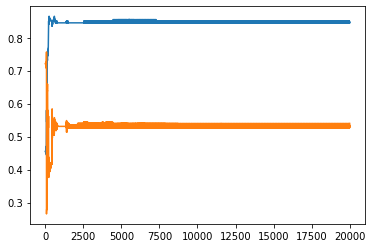

In [ ]:
plt.plot(np.arange(20000), train_acc_hist_overfit, label="train") #20000 ist die Anzahl an Trainingsiterationen
plt.plot(np.arange(20000), test_acc_hist_overfit, label="test")
plt.show()

Aha! Hier sehen wir also, wie die Trainingsgenauigkeit in die Höhe schießt, die Testgenauigkeit aber auf einem deutlich tieferen Wert sitzen bleibt und nicht weiter nach oben geht.

Dies war jetzt ein Beispiel, an welchem man Overfitting erkennen kann.
Die Kurven für ein unterangepasstes, sowie ein normales Modell könnten wir hier auch noch plotten,
aber diese sehen nicht ganz so spektakulär aus und sind auch nicht ganz so wichtig.
Gerne kannst du einmal selbst versuchen, diese Kurven zu plotten!

---


### Du hast es geschafft! 🥳 

Du kannst wirklich stolz auf dich sein! Es ist sicherlich einiges an Zeit und Hirnschmalz in dieses Tutorial geflossen. Vielleicht hat dich dieses Tutorial ja dazu inspiriert eine eigene Idee mit den Methoden der KI anzugehen. Reiche dein Projekt jährlich beim Bundeswettbewerb KI ein und gewinne tolle Preise. 

Wie geht es jetzt weiter? Es warten weitere spannende Kurselemente auf euch:
- KI & Gesselschaft, spannende Artikel & Quizfragen
- Knackt die Überflieger Aufgaben des Python Grundkurses
- Übt im Aufgabenpool
- Macht das nächste Tutorial zu CNNs - das Recycling Tutorial mit Boris

Es gibt also viel zu tun!

Unter dem Reiter --> Zertifikat im Hauptmenü kannst du dir deine Leistungen in diesem Kurs bescheinigen lassen.

Wir wünschen dir viel Spaß beim Lernen 😊
Euer BWKI Team